# Tarea de Scraping Web con Python y Selenium

## Objetivo
Desarrollar habilidades prácticas en scraping web utilizando Python con Selenium y BeautifulSoup. Se espera que manejen el navegador de forma programática para extraer datos dinámicos de un sitio web específico y que realicen un análisis básico de los datos obtenidos.

## Instrucciones
1. Configura tu entorno de desarrollo instalando las librerías necesarias: Selenium, BeautifulSoup, pandas, entre otras que consideres necesarias.
2. Configura un navegador usando Selenium. Debes asegurarte de incluir opciones como el modo incógnito y el modo sin interfaz gráfica (headless).
3. Elige un sitio web que ofrezca datos dinámicos y sea legal para hacer scraping (por ejemplo, datos meteorológicos, precios de productos, cotizaciones de bolsa).
4. Navega al sitio web utilizando Selenium, realiza búsquedas o filtra datos si es necesario utilizando interacciones del navegador.
5. Extrae datos relevantes usando Selenium y BeautifulSoup. Debes obtener al menos tres tipos de datos relacionados (por ejemplo, nombre del producto, precio y categoría).
6. Limpia y organiza los datos extraídos en un DataFrame de pandas.
7. Realiza un análisis básico de los datos: puede ser estadístico descriptivo o alguna visualización simple.
8. Documenta cada paso del proceso con comentarios en el código y celdas Markdown explicando las decisiones y métodos utilizados.

## Criterios de Evaluación
- Correcta configuración y uso de Selenium y BeautifulSoup.
- Capacidad para navegar y extraer datos de forma efectiva y eficiente.
- Limpieza y estructuración adecuada de los datos extraídos.
- Calidad del análisis realizado y claridad en la documentación.

## Entrega
- Debes entregar este cuaderno Jupyter completado con todo el código, análisis y documentación solicitada.

¡Buena suerte y que disfrutes del proceso de aprendizaje y exploración de datos!


1. Configura tu entorno de desarrollo instalando las librerías necesarias: Selenium, BeautifulSoup, pandas, entre otras que consideres necesarias.

In [ ]:
#Instalar las librerías necesarias
!pip install -r requirements.txt

In [ ]:
#También estas que no estaban en el requirements
!pip install pandas matplotlib

In [78]:
#Importar las librerías necesarias
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


2. Configura un navegador usando Selenium. Debes asegurarte de incluir opciones como el modo incógnito y el modo sin interfaz gráfica (headless).

In [79]:
#Configurar el navegador
options = Options()
options.add_argument('--incognito')
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument('--no-sandbox')

# Inicializar el navegador
driver = webdriver.Chrome(options)

3. Elige un sitio web que ofrezca datos dinámicos y sea legal para hacer scraping (por ejemplo, datos meteorológicos, precios de productos, cotizaciones de bolsa).

Elegí Mercado libre para buscar precios de Laptops porque está en mis planes vender la mía jajaj, entonces voy a buscar los precios de las laptops.

4. Navega al sitio web utilizando Selenium, realiza búsquedas o filtra datos si es necesario utilizando interacciones del navegador.

In [80]:
# Entrar a mercado libre
driver.get('https://www.mercadolibre.com.mx/')

In [81]:
# Buscar las laptops
search_box = driver.find_element(By.NAME, "as_word")
search_box.send_keys("laptops")
search_box.send_keys(Keys.RETURN)  

5. Extrae datos relevantes usando Selenium y BeautifulSoup. Debes obtener al menos tres tipos de datos relacionados (por ejemplo, nombre del producto, precio y categoría).

In [82]:
#Utilizar BeautifulSoup para analizar el contenido de la página cargada por Selenium
soup = BeautifulSoup(driver.page_source, 'html.parser')
items = soup.find_all('div', {'class': 'ui-search-result__content-wrapper'})

#Extraer la información de las laptops
data = []
for item in items:
    name = item.find('h2', {'class': 'ui-search-item__title'}).text
    price_span = item.find('span', {'class': 'andes-money-amount__fraction'})
    price = price_span.text if price_span else 'N/A'
    link = item.find('a', {'class': 'ui-search-link'})['href']
    data.append([name, price, link])

#Cerrar el navegador
driver.quit()


In [83]:
print(data)

[['Laptop Huawei Matebook D15 Core I5 11.5th 8gb +512ssd Color Plateado', '16,999', 'https://click1.mercadolibre.com.mx/mclics/clicks/external/MLM/count?a=JJaqf0SR7FalQyZpkLSqXQxR%2BcuApprqdUtIOowrZx6njQ2l0SJevDipZ8km7Wy96Hn%2B3HJauNI1BnBDhu74ttVUivE8PljaxmM9RNtirajS2VxErHOMnIGO9N2UfRWtnMD1ytu0wqAxRmOhs3xWvNpQC5oROI8%2Fa9D%2F4icugwsteYCScfqld%2BMf%2BI78JD2mCJF1cvpI2hm2bK2Djr7fdQRWrasoPYnQ8gvfpEvN13PDREnVjU4rI9N%2BAJl3q4dcJhFDk%2BrJO16S1zwT2lyhdevvoymEcBmGPjlZ8OufBuT%2F1CHwFeu2ejRr11Ldj18sLr%2FQo1PUc7oz45qagcVOM0vhCwebMh2CwdW8yHf8KFv55Umb2yquTbZZajN4PrVjeEX4PsUxX%2BI%2FD6lOYO3jIyGVehLmxK8EoLlk5VIZoVVOdx924edl2tzuI%2F%2Bl3O7WO2YbVwLHcwQUHhiRfpZ%2BCaycu5aD%2BbgG9ybK5gmGNEHXGEIjYHcger7hLL60PY%2F9%2FaTlI2OFllnZReIkAUsyO1fU%2BxAohEAsRTHDwIYj9Qrq2D%2F84WhklxljyiEJB1Q48WItAoINZXeplu3kapH9R%2B6kUCG8MRsKOslgD5fXjXxW531XZA%2Bnj%2BubQtH786S6H7dGB33S5xgyr4Zju75p199F0T9ULQnNhwa2hTw%2B6EjtwJ9HOIiY0%2F1yBsUIhHgnU5TCEgN1jCyesh51OLDlFrgOBIwoMQzGdhXlxjTLwQIsyC9Bin4j5JRaJR7Bq04xuXM%2BrodrBsKz3up7f2ZG6HXtx

6. Limpia y organiza los datos extraídos en un DataFrame de pandas.

In [84]:
#Crear un DataFrame con la información extraída
df = pd.DataFrame(data, columns=['Name', 'Price', 'Link'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Name,Price,Link
0,Laptop Huawei Matebook D15 Core I5 11.5th 8gb ...,16999.0,https://click1.mercadolibre.com.mx/mclics/clic...
1,Laptop Huawei Matebook D16 I5 12a 8gb 512gb Ss...,16999.0,https://click1.mercadolibre.com.mx/mclics/clic...
2,Laptop Huawei Matebook D 14 Ci5 12a 8 Gb +512 ...,16999.0,https://www.mercadolibre.com.mx/laptop-huawei-...
3,Laptop Huawei Matebook D 14 Ci3 12a 8 Gb 256 G...,13999.0,https://click1.mercadolibre.com.mx/mclics/clic...
4,Laptop Huawei Matebook D 14 Ci5 12a 8 Gb +512 ...,16999.0,https://click1.mercadolibre.com.mx/mclics/clic...


In [85]:
#Usé esto para ver el count, min y max de los precios
print(df.describe())

              Price
count     56.000000
mean   12544.035714
std     5682.694457
min     2769.000000
25%     7715.000000
50%    12300.500000
75%    16999.000000
max    25999.000000


7. Realiza un análisis básico de los datos: puede ser estadístico descriptivo o alguna visualización simple.


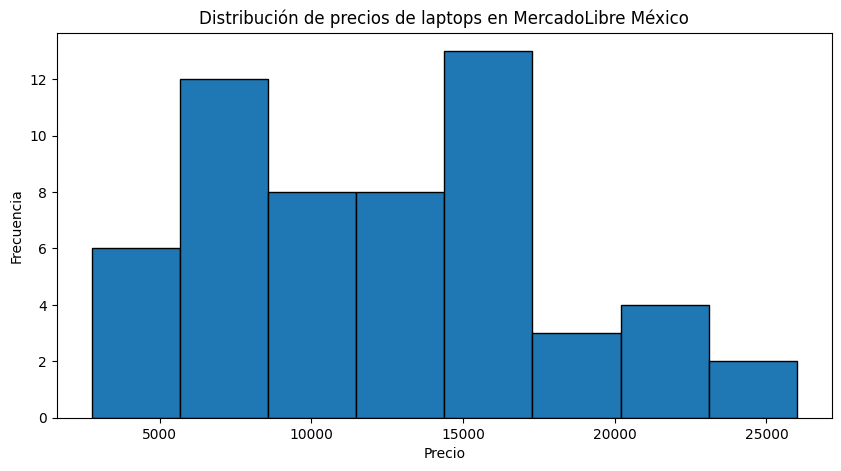

In [87]:
# Graficar la distribución de precios
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=8, edgecolor='k')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de laptops en MercadoLibre México')
plt.show()